___
<h1 style="color:blue;">t-Distributed Stochastic Neighbor Embedding (t-SNE)</h1>

___


## Introduction to t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a dimensionality reduction technique that is well-suited for embedding high-dimensional data into lower-dimensional spaces. It is particularly useful for visualizing complex datasets in two or three dimensions. t-SNE is a nonlinear technique that preserves local structure in the data, making it effective for visualizing clusters or groups of data points.

## Key Concepts

### 1. Dimensionality Reduction
Dimensionality reduction is the process of reducing the number of features (dimensions) in a dataset while preserving the essential information. It is commonly used to visualize high-dimensional data in lower-dimensional spaces, making it easier to interpret and analyze.

### 2. t-SNE Algorithm
The t-SNE algorithm works by modeling the high-dimensional data as a set of pairwise similarities and then embedding the data into a lower-dimensional space such that the similarities are preserved as much as possible. The algorithm minimizes the difference between the pairwise similarities in the high-dimensional space and the embedded space using a cost function based on the t-distribution.

### 3. Perplexity
Perplexity is a parameter in t-SNE that controls the number of nearest neighbors considered when computing the similarity between data points. It is a measure of the effective number of neighbors for each data point and can influence the local structure of the embedding.

### 4. Learning Rate
The learning rate in t-SNE controls the step size during optimization and affects the convergence of the algorithm. A higher learning rate can lead to faster convergence but may result in suboptimal embeddings, while a lower learning rate can improve the quality of the embedding but may require more iterations.


## Algorithm

The t-SNE algorithm can be summarized in the following steps:

1. Compute pairwise similarities between data points in the high-dimensional space using a Gaussian kernel.
2. Initialize the embedding in the low-dimensional space (e.g., randomly or using another dimensionality reduction technique).
3. Compute the pairwise similarities between embedded points in the low-dimensional space using a t-distribution.
4. Minimize the difference between the pairwise similarities in the high-dimensional space and the embedded space using gradient descent.
5. Update the embedding iteratively until convergence or a specified number of iterations.

## Iris Dataset Overview

### Description
The Iris dataset is a classic and well-known dataset in machine learning and statistics. It was introduced by the British statistician and biologist Ronald Fisher in 1936. The dataset is often used for demonstrating various machine learning algorithms and statistical techniques due to its simplicity and effectiveness in testing classification problems.

### Content
The Iris dataset consists of 150 instances, where each instance represents a different iris flower. There are three classes (species) of iris plants in the dataset, each represented by 50 instances:
- Iris Setosa
- Iris Versicolor
- Iris Virginica

For each instance, the following four features are recorded:
1. Sepal Length (in cm)
2. Sepal Width (in cm)
3. Petal Length (in cm)
4. Petal Width (in cm)

### Purpose
The main purpose of the Iris dataset is to test classification algorithms. Given the four features of an iris flower, the goal is to predict its species among the three classes. 

### Source
The dataset is readily available in various machine learning libraries and repositories, including:
- Scikit-learn: `sklearn.datasets.load_iris()`
- UCI Machine Learning Repository: [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris)



___
## <span style="color:blue;">Data Exploration and Preprocessing</span>

___


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# Load the Iris dataset
iris = load_iris()

# Convert to DataFrame for better visualization (optional)
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Display the first few rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


>  Making Histograms of the data to understand the distribution of the data.

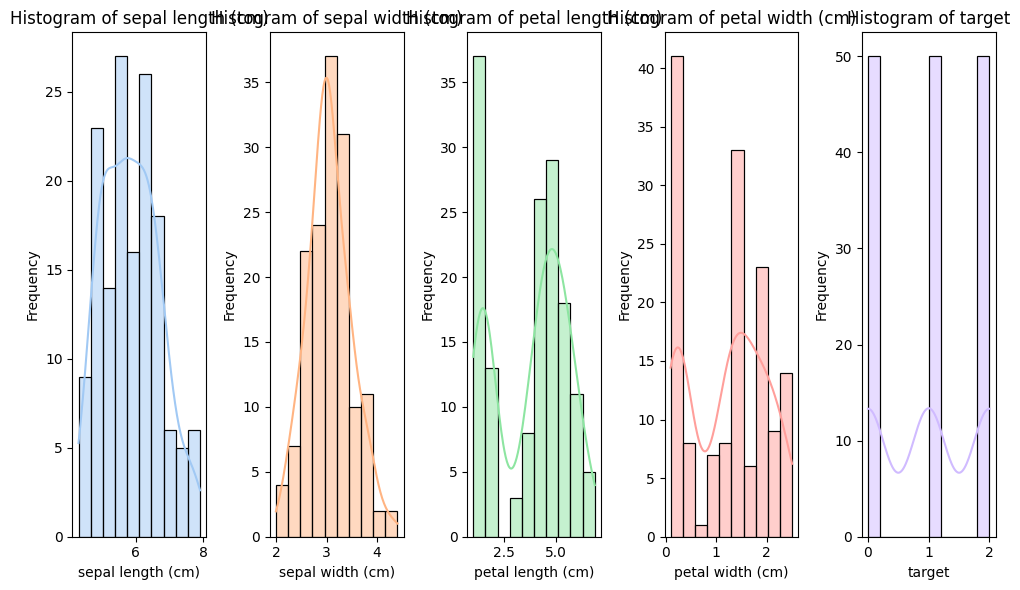

In [2]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(1,5, i + 1)
    sns.histplot(df[col], bins=10, kde=True, color=palette[i], edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

> Making box plots to understand the spread of the data.

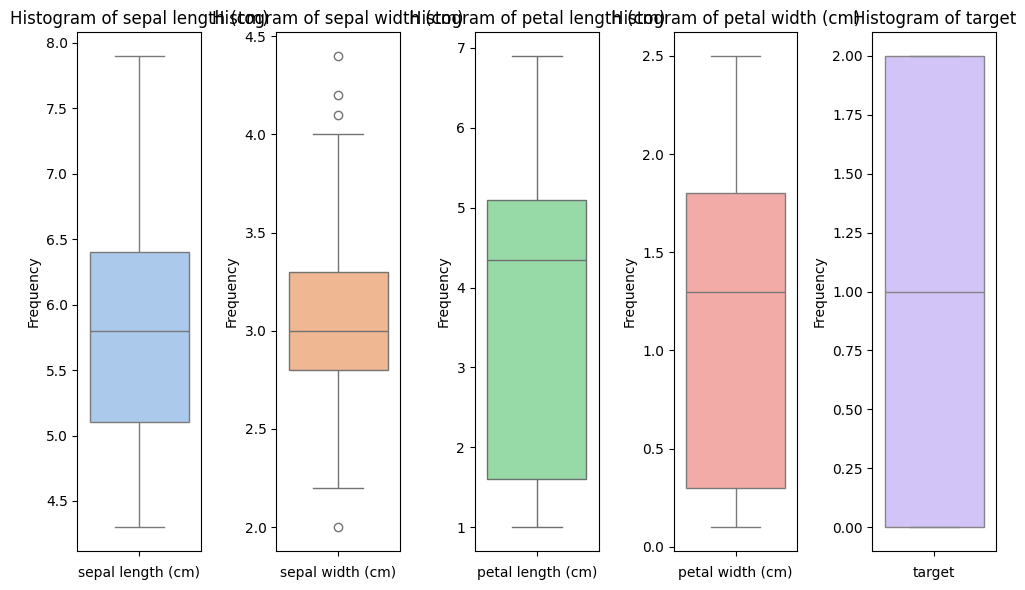

In [3]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(df[col], color=palette[i])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

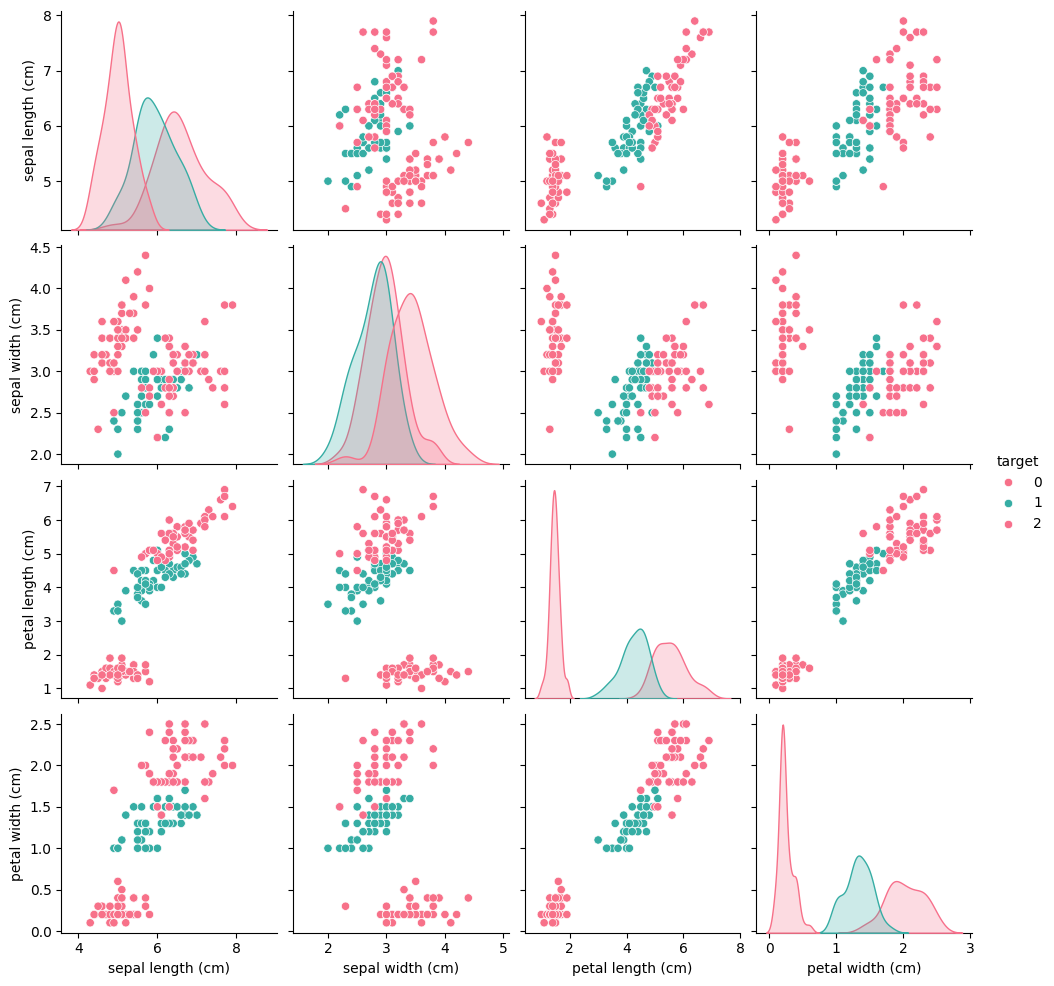

In [4]:
# pairplot
sns.pairplot(df, hue='target', palette='husl')

### Correlation Analysis

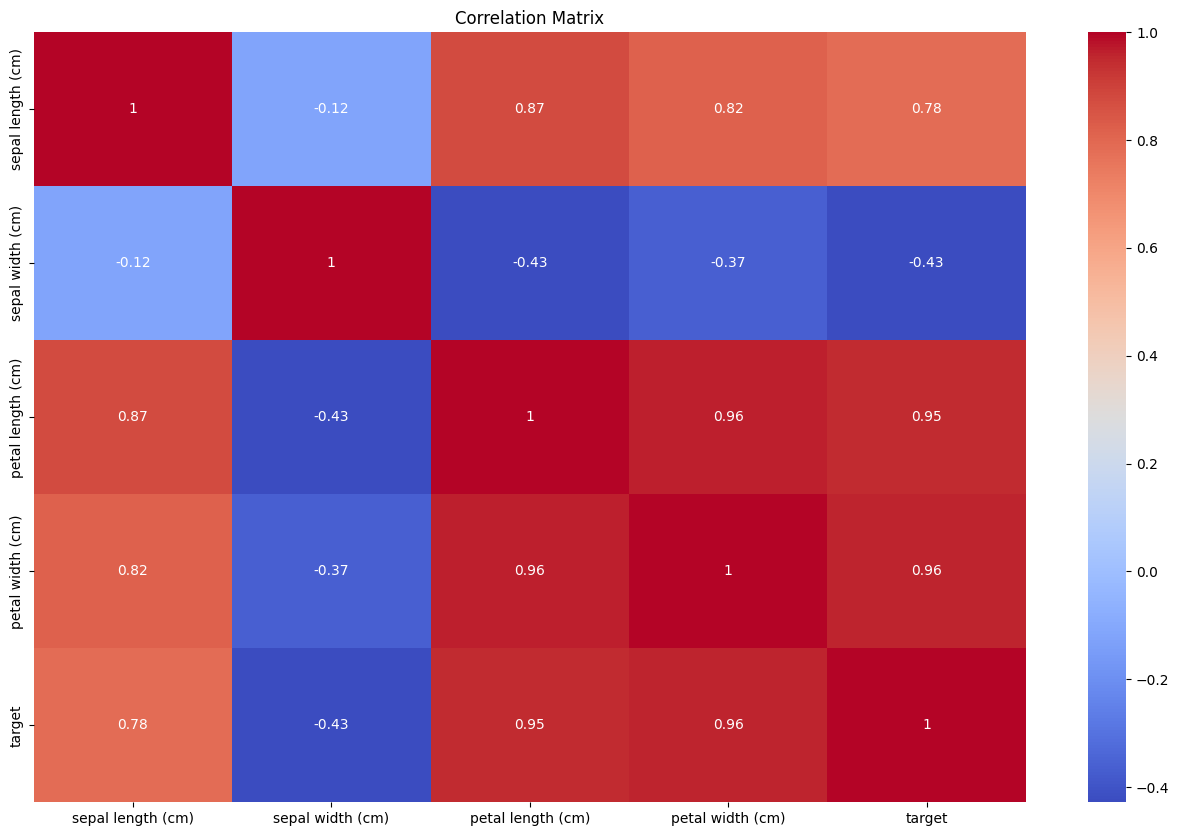

In [5]:
# Calculating the Correlation 
correlation = df.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

___
## <span style="color:blue;">Model Development</span>
___

### Scikit-learn t-Distributed Stochastic Neighbor Embedding (t-SNE) Model:

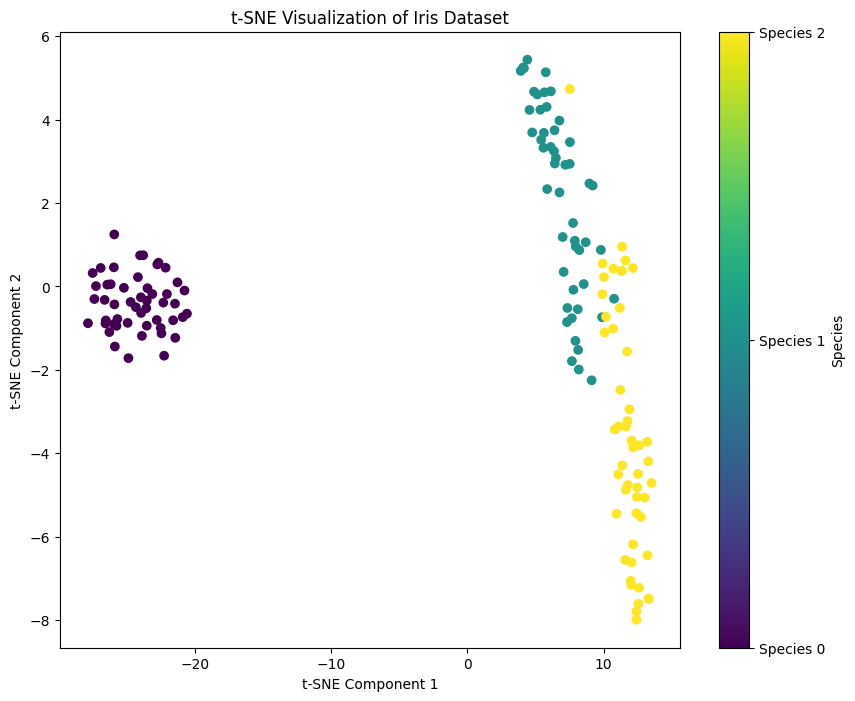

In [6]:
X = iris.data
y = iris.target

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize the t-SNE result
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE Visualization of Iris Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Species', ticks=range(3), format='Species %d')
plt.show()

___
## <span style="color:blue;">Model Evaluation</span>

___

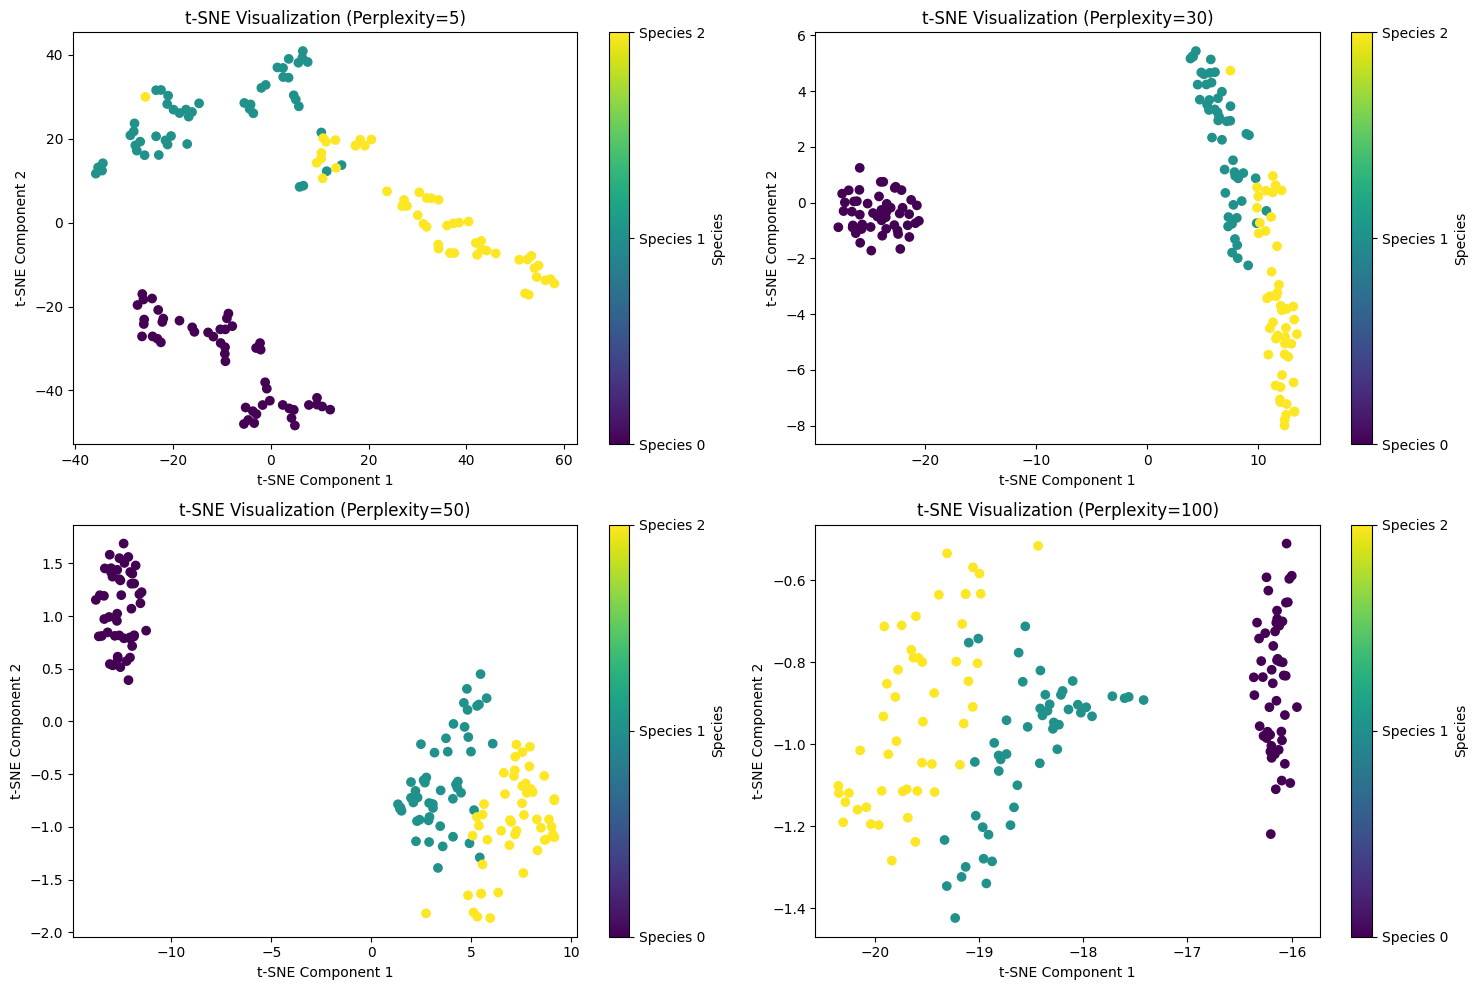

In [7]:
# Experiment with different perplexity values
perplexities = [5, 30, 50, 100]
plt.figure(figsize=(15, 10))

for i, perplexity in enumerate(perplexities):
    # Initialize t-SNE with current perplexity value
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Plotting
    plt.subplot(2, 2, i + 1)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
    plt.title(f't-SNE Visualization (Perplexity={perplexity})')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.colorbar(label='Species', ticks=np.arange(3), format='Species %d')
    
plt.tight_layout()
plt.show()

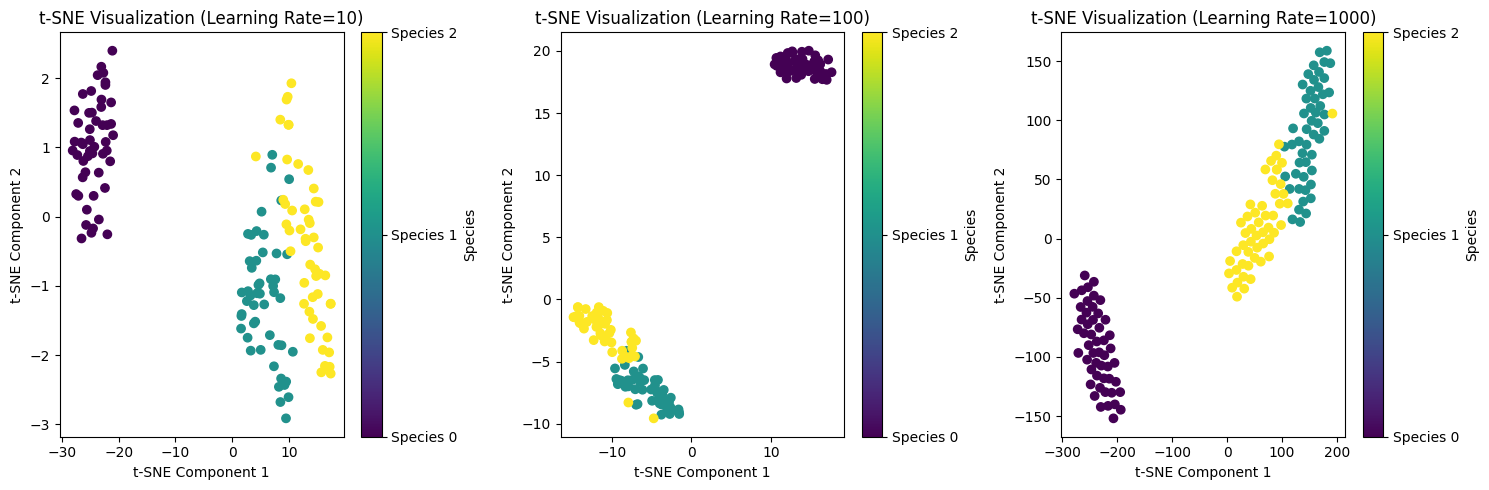

In [8]:
# Experiment with different learning rate values
learning_rates = [10, 100, 1000]
plt.figure(figsize=(15, 5))

for i, lr in enumerate(learning_rates):
    # Initialize t-SNE with current learning rate value
    tsne = TSNE(n_components=2, learning_rate=lr, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Plotting
    plt.subplot(1, 3, i + 1)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
    plt.title(f't-SNE Visualization (Learning Rate={lr})')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.colorbar(label='Species', ticks=np.arange(3), format='Species %d')

plt.tight_layout()
plt.show()

___
## <span style="color:blue;">CONCLUSION</span>

___

### Evaluation of t-SNE on Iris Dataset

#### Perplexity Evaluation

- **Visualization**: t-SNE was applied to the Iris dataset with different perplexity values (5, 30, 50, and 100). Each visualization showed how the data points were clustered in a 2-dimensional space based on their perplexity setting.
  
- **Insights**: Lower perplexity values (e.g., 5) tended to emphasize local relationships, whereas higher values (e.g., 50 and 100) emphasized global structure. Perplexity of 30 appeared to strike a balance, revealing distinct clusters corresponding to Iris species.

#### Learning Rate Evaluation

- **Visualization**: t-SNE was also evaluated with various learning rates (10, 100, and 1000). The resulting visualizations depicted how different learning rates influenced the distribution and separation of data points in the 2D embedding.

- **Observations**: Lower learning rates (e.g., 10) allowed more time for clusters to separate, while higher rates (e.g., 1000) led to faster convergence but potentially less distinct clusters.

### Recommendations

- **Optimal Parameters**: Based on these evaluations, a perplexity of 30 and a moderate learning rate (e.g., 100) appear to provide a good balance of local and global structure representation in the t-SNE embeddings for the Iris dataset.
  
- **Further Exploration**: Experimenting with additional parameters and techniques (such as PCA preprocessing or different distance metrics) could refine the clustering visualization and uncover deeper insights into the dataset's structure.

### Acknowledgments

- **Data Source**: The Iris dataset used in this analysis is a classic dataset in machine learning, widely available and commonly used for demonstrating clustering and dimensionality reduction techniques.

By systematically exploring different perplexity and learning rate settings, t-SNE allows us to visualize complex datasets like Iris in a reduced dimensional space, facilitating better understanding of underlying patterns and relationships.
